## Proble Statement:

Educational institutions often lack data-driven methods to identify students who may be at risk of poor academic performance. This project aims to analyze student academic, behavioral, and extracurricular data and build a machine learning model to predict student performance levels. The objective is to help educators identify key factors affecting performance and enable early intervention to improve learning outcomes.

## Steps:
1. Loading the data
2. Data Preprocessing & EDA
3. Visualizing the data
4. Splitting the data
5. Model Building and Training
6. Comparision of Model
7. Conclusion

In [78]:
## Importing Required Libraries

#!pip install xgboost

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [79]:
# loading data into dataframe
df = pd.read_csv("Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Data Preprocessing and EDA

In [80]:
print(f'The shapes of the Dataframe is: {df.shape}')

The shapes of the Dataframe is: (2392, 15)


In [81]:
print(f'The columns of the dataset are: \n {df.columns}')

The columns of the dataset are: 
 Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


In [82]:
print(f'\nThe Summery Statistics of the dataset are:\n {df.describe().T}')


The Summery Statistics of the dataset are:
                     count         mean         std          min          25%  \
StudentID          2392.0  2196.500000  690.655244  1001.000000  1598.750000   
Age                2392.0    16.468645    1.123798    15.000000    15.000000   
Gender             2392.0     0.510870    0.499986     0.000000     0.000000   
Ethnicity          2392.0     0.877508    1.028476     0.000000     0.000000   
ParentalEducation  2392.0     1.746237    1.000411     0.000000     1.000000   
StudyTimeWeekly    2392.0     9.771992    5.652774     0.001057     5.043079   
Absences           2392.0    14.541388    8.467417     0.000000     7.000000   
Tutoring           2392.0     0.301421    0.458971     0.000000     0.000000   
ParentalSupport    2392.0     2.122074    1.122813     0.000000     1.000000   
Extracurricular    2392.0     0.383361    0.486307     0.000000     0.000000   
Sports             2392.0     0.303512    0.459870     0.000000     0.00000

In [83]:
#Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [84]:
# Converting data type of GradeClass
df['GradeClass']= df['GradeClass'].astype(int)

In [85]:
df['GradeClass'].dtype

dtype('int64')

In [86]:
# Count of Different Grade Class

df['GradeClass'].value_counts()

,count
GradeClass,
4,1211
3,414
2,391
1,269
0,107


Observation:

- There are 2392 instances and 15 features in our dataset.
- Out of which 14 features are independent and 1 is dependent.
- Most of the features's data types is int type.
- There is no null-values in dataset.

## Visualizing the dataset
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

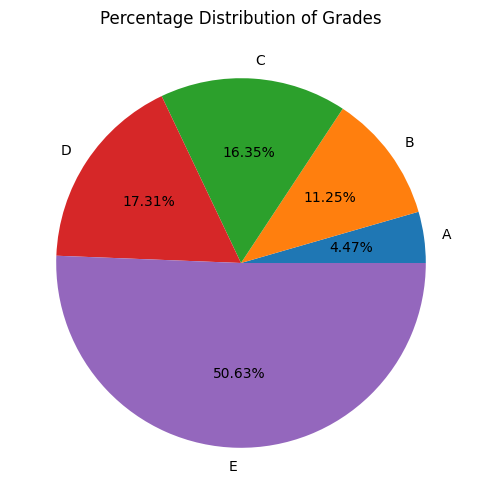

In [118]:
plt.figure(figsize=(8,6))

grade_counts = df['GradeClass'].value_counts().sort_index()

plt.pie(
    grade_counts,
    labels=['A','B','C','D','E'],  # 0→A ... 4→E
    autopct='%1.2f%%'
)

plt.title('Percentage Distribution of Grades')
plt.show()

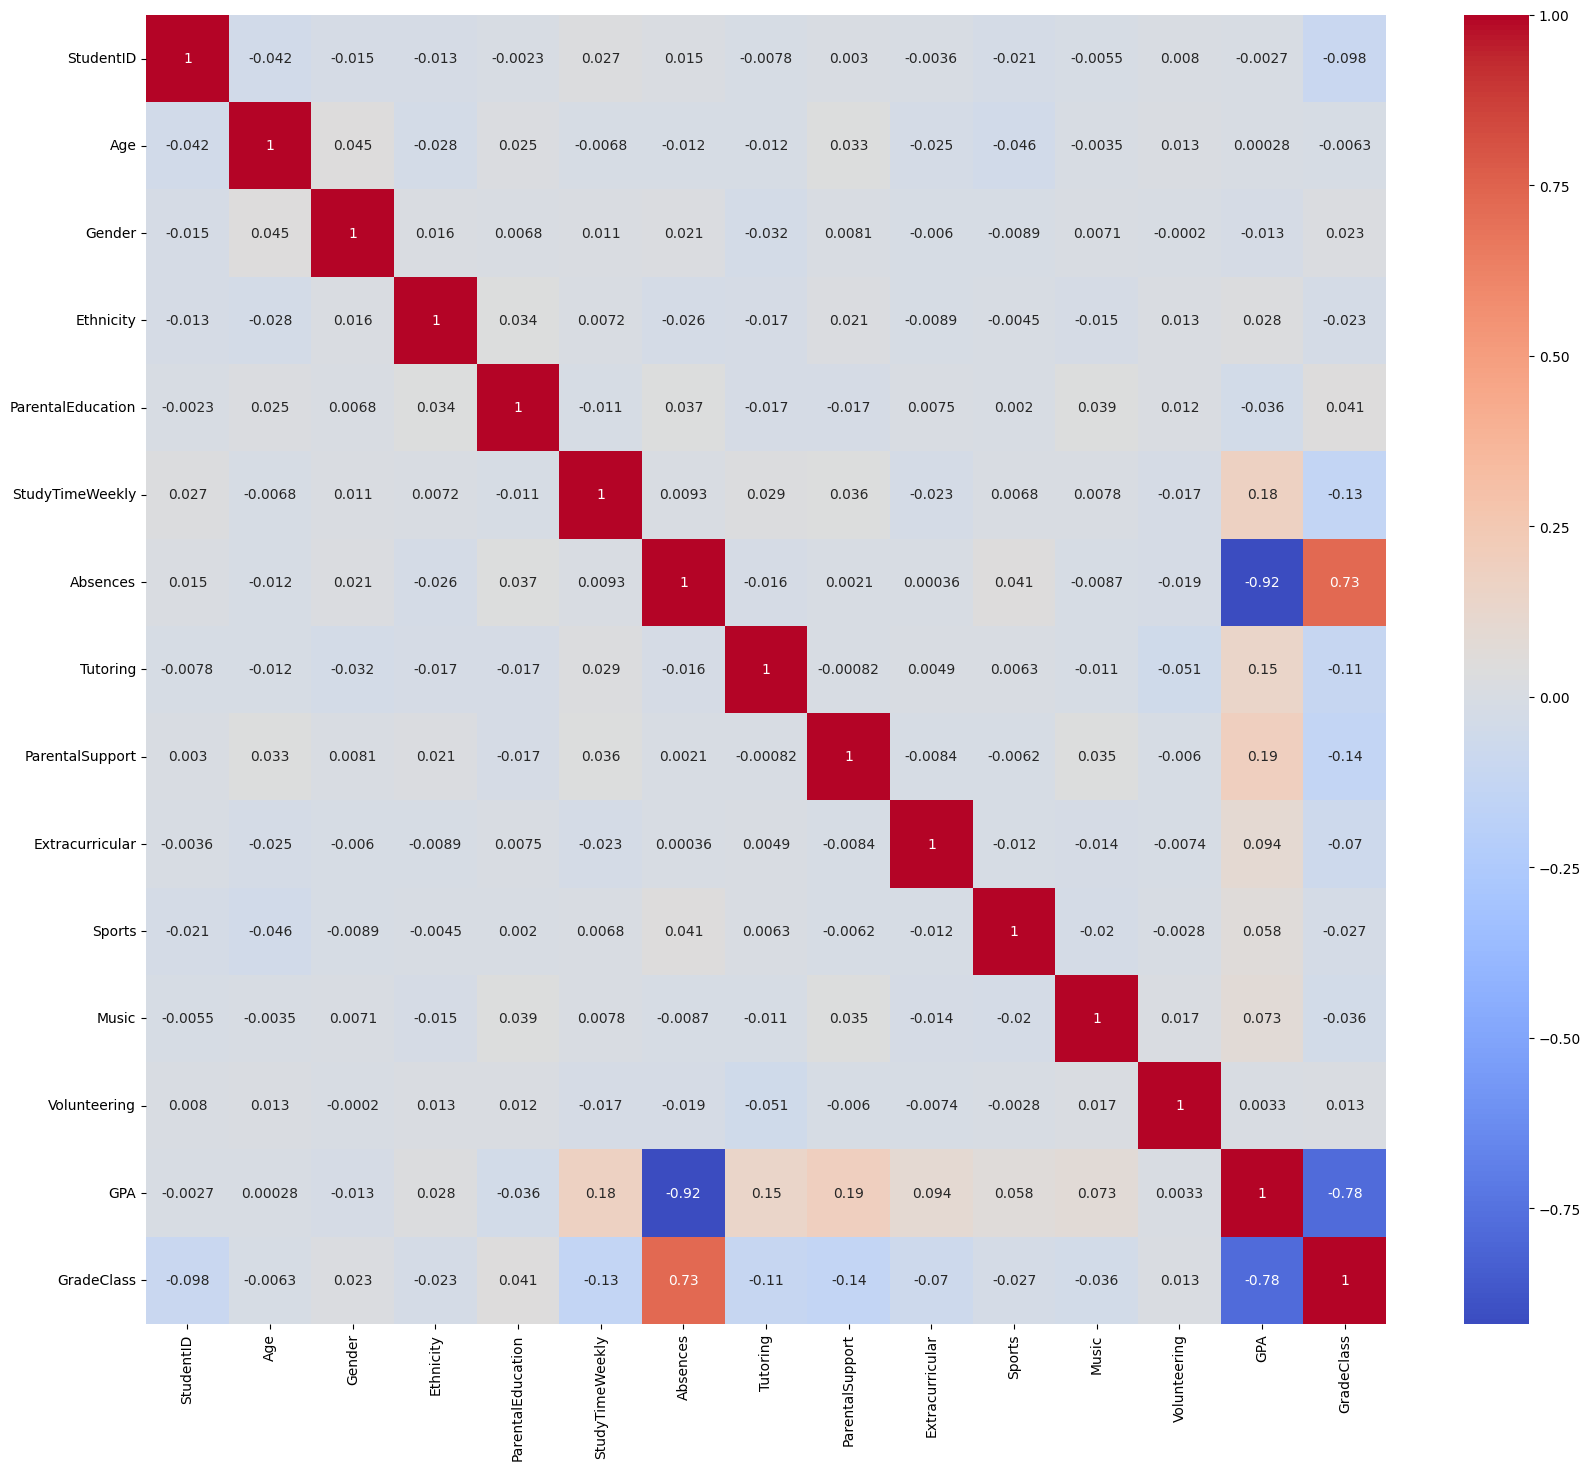

In [88]:
#Correlation heatmap
plt.figure(figsize=(20,17))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [89]:
#  Identify Features Highly Correlated with Target (class)
corr_with_target = df.corr()['GradeClass'].sort_values(ascending=False)
corr_with_target

,GradeClass
GradeClass,1.000000
Absences,0.728633
ParentalEducation,0.041031
Gender,0.022998
Volunteering,0.013156
Age,-0.006250
Ethnicity,-0.023326
Sports,-0.026654
Music,-0.036065
Extracurricular,-0.069733


[]

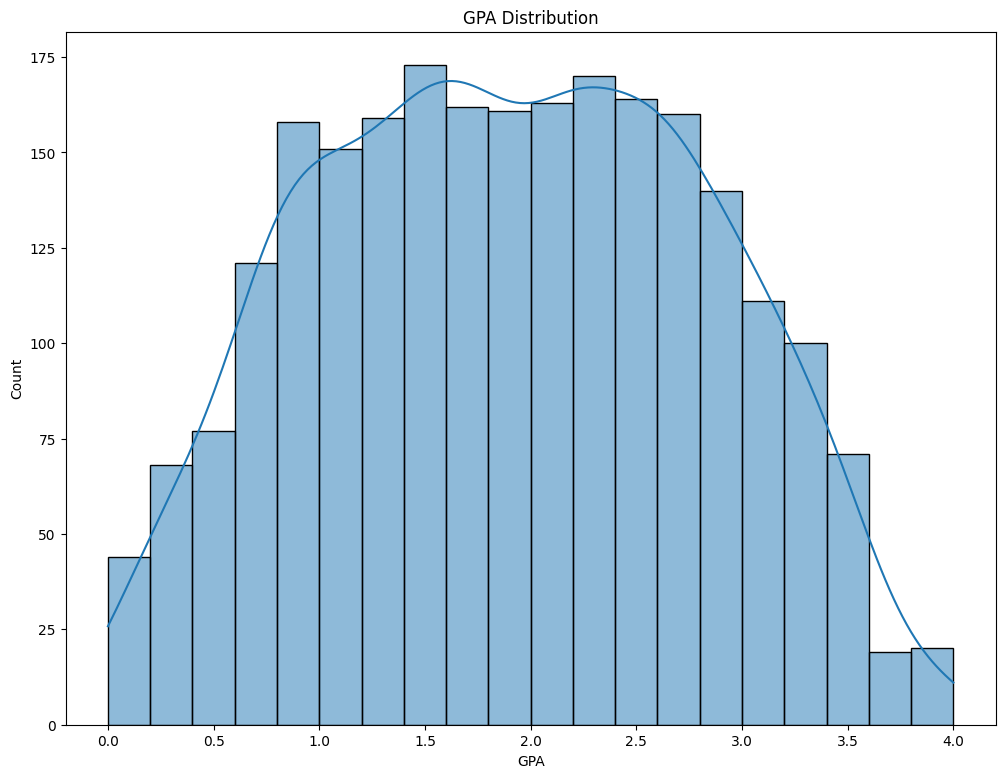

In [90]:
# GPA Distribution
plt.figure(figsize= (12,9))
sns.histplot(df['GPA'], bins = 20, kde = True)
plt.title("GPA Distribution")
plt.plot()

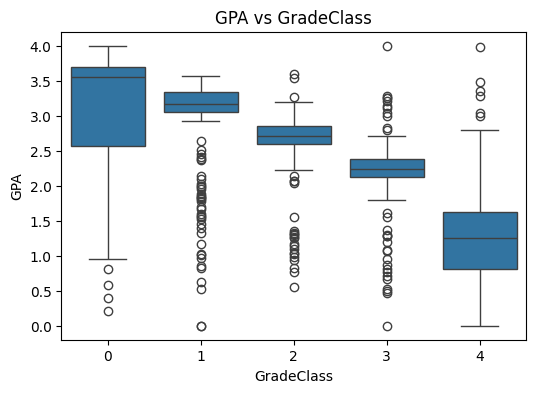

In [91]:
plt.figure(figsize=(6,4))
sns.boxplot(x='GradeClass', y='GPA', data=df)
plt.title('GPA vs GradeClass')
plt.show()


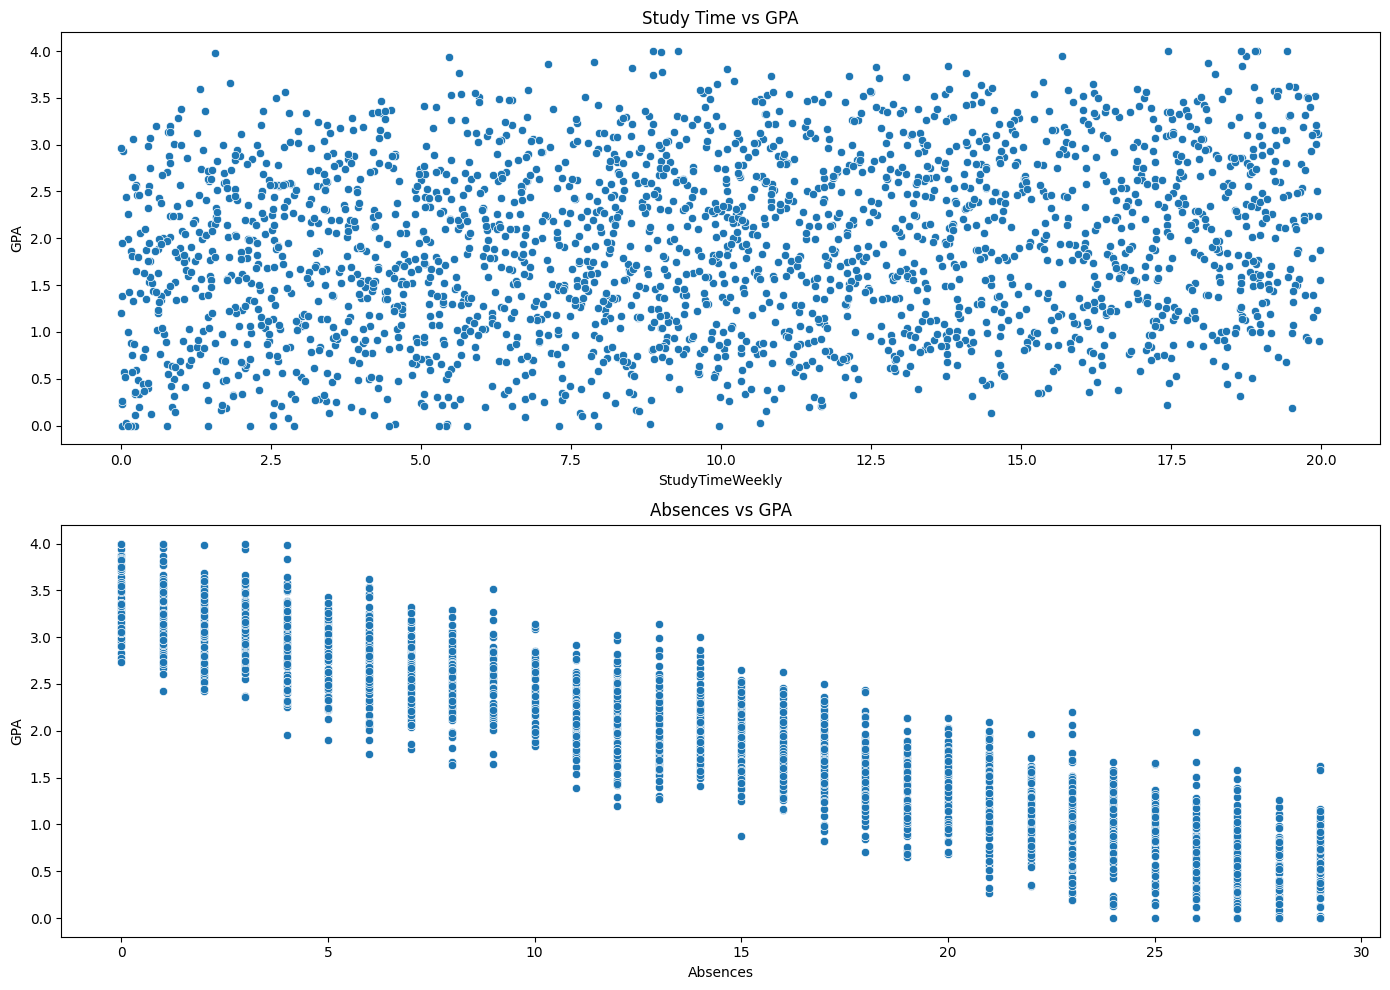

In [92]:
# Study Behavior Analysis

plt.figure(figsize=(14,10))

# Plot 1
plt.subplot(2, 1, 1)
sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
plt.title("Study Time vs GPA")

# Plot 2
plt.subplot(2, 1, 2)
sns.scatterplot(x='Absences', y='GPA', data=df)
plt.title("Absences vs GPA")

plt.tight_layout()
plt.show()

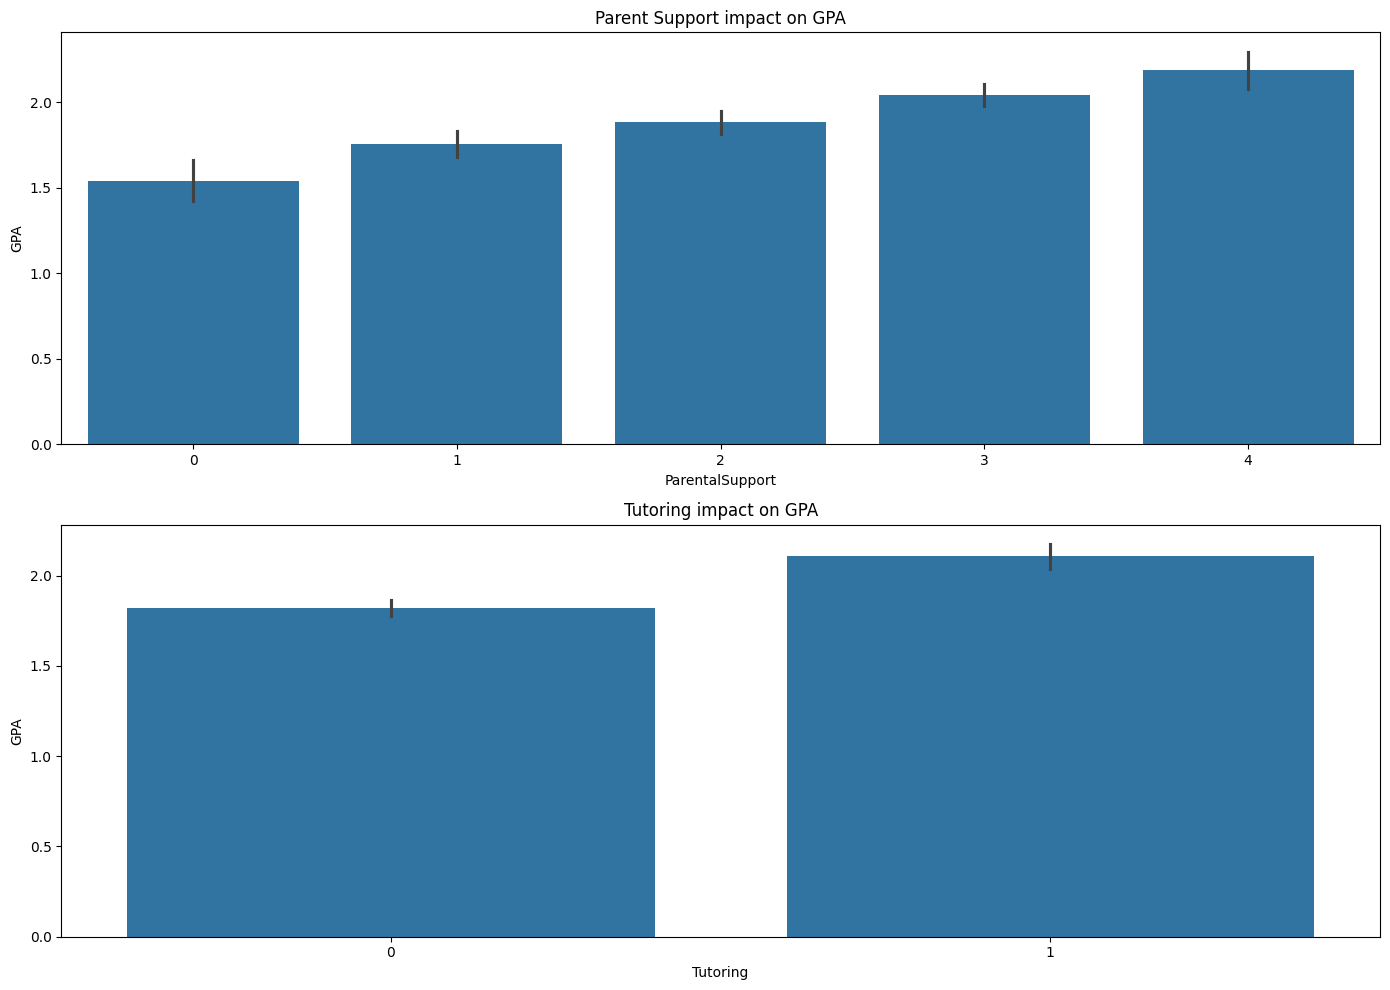

In [93]:
# Support & Tutoring Impact
plt.figure(figsize=(14,10))

# Plot 1
plt.subplot(2, 1, 1)
sns.barplot(x='ParentalSupport', y='GPA', data=df)
plt.title("Parent Support impact on GPA")

# Plot 2
plt.subplot(2, 1, 2)
sns.barplot(x='Tutoring', y='GPA', data=df)
plt.title("Tutoring impact on GPA")

plt.tight_layout()
plt.show()

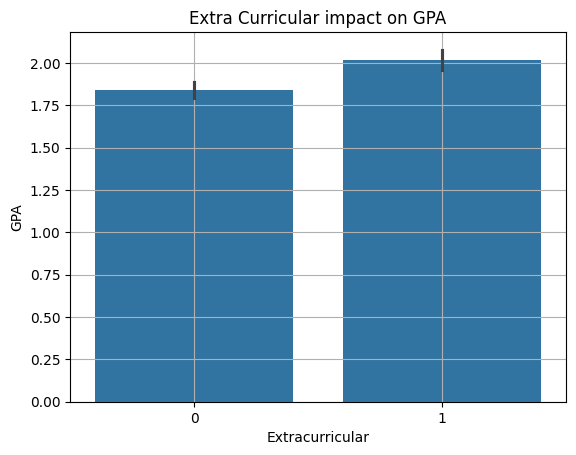

In [94]:
# Extra curricular impact on GPA
sns.barplot(x='Extracurricular', y='GPA', data=df)
plt.title("Extra Curricular impact on GPA")
plt.grid(True)
plt.show()

I performed EDA using distribution plots, box plots, scatter plots, and correlation heatmaps to understand performance patterns.

In [95]:
# Drop StudentID columns
df = df.drop('StudentID',axis = 1)

# Splitting the Data :

In [96]:
# Splitting the dataset into dependent and independent features.
X = df.drop('GradeClass', axis = 1)
y = df['GradeClass']

In [97]:
# Splitting the dataset for train and test , 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=42)

print('The shapes area : ')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

The shapes area : 


((1794, 13), (598, 13), (1794,), (598,))

# Model Building and Training

In [98]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [99]:
df.GradeClass.unique()

array([2, 1, 4, 3, 0])

# Logistic Regression Model:

In [100]:
# Initialize the model using Pipeline
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=1000,
        multi_class='multinomial',
        random_state=42,
    ))
])

log_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=42))])

In [101]:
# Prediction
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [102]:
# Accuracy
acc_train_log = accuracy_score(y_train, y_train_pred)
acc_test_log = accuracy_score(y_test, y_test_pred)

print("Logistic Regression : Accuracy (Train): {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy (Test): {:.3f}".format(acc_test_log))
print()

# F1 Score
f1_train_log = f1_score(y_train, y_train_pred, average='weighted')
f1_test_log = f1_score(y_test, y_test_pred, average='weighted')

print("Logistic Regression : F1 Score (Train): {:.3f}".format(f1_train_log))
print("Logistic Regression : F1 Score (Test): {:.3f}".format(f1_test_log))
print()

# Recall
recall_train_log = recall_score(y_train, y_train_pred, average='weighted')
recall_test_log = recall_score(y_test, y_test_pred, average='weighted')

print("Logistic Regression : Recall (Train): {:.3f}".format(recall_train_log))
print("Logistic Regression : Recall (Test): {:.3f}".format(recall_test_log))
print()

# Precision
precision_train_log = precision_score(y_train, y_train_pred, average='weighted')
precision_test_log = precision_score(y_test, y_test_pred, average='weighted')

print("Logistic Regression : Precision (Train): {:.3f}".format(precision_train_log))
print("Logistic Regression : Precision (Test): {:.3f}".format(precision_test_log))

Logistic Regression : Accuracy (Train): 0.815
Logistic Regression : Accuracy (Test): 0.806

Logistic Regression : F1 Score (Train): 0.801
Logistic Regression : F1 Score (Test): 0.798

Logistic Regression : Recall (Train): 0.815
Logistic Regression : Recall (Test): 0.806

Logistic Regression : Precision (Train): 0.805
Logistic Regression : Precision (Test): 0.802


In [103]:
#computing the classification report of the model

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.26      0.36        27
           1       0.60      0.52      0.56        67
           2       0.61      0.77      0.68        98
           3       0.83      0.67      0.74       103
           4       0.92      0.98      0.95       303

    accuracy                           0.81       598
   macro avg       0.71      0.64      0.66       598
weighted avg       0.80      0.81      0.80       598



In [104]:
#computing the Confusion matrix of the model
print(f'Confusion matrix is : \n {confusion_matrix(y_test, y_test_pred)}')

Confusion matrix is : 
 [[  7   8   3   3   6]
 [  4  35  23   1   4]
 [  1  12  75   7   3]
 [  0   0  20  69  14]
 [  0   3   1   3 296]]


In [105]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression', acc_test_log ,f1_test_log, recall_test_log, precision_test_log)

# Random forest Classifier:

In [106]:
# Initialize Random Forest model
rf_cls = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight= 'balanced'
)

# train the model
rf_cls.fit(X_train, y_train)

# prediction
y_train_pred = rf_cls.predict(X_train)
y_test_pred = rf_cls.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Accuracy
acc_train_RFC = accuracy_score(y_train, y_train_pred)
acc_test_RFC = accuracy_score(y_test, y_test_pred)

print("Random Forest : Accuracy (Train): {:.3f}".format(acc_train_RFC))
print("Random Forest : Accuracy (Test): {:.3f}".format(acc_test_RFC))
print()

# F1 Score
f1_train_RFC = f1_score(y_train, y_train_pred, average='weighted')
f1_test_RFC = f1_score(y_test, y_test_pred, average='weighted')

print("Random Forest : F1 Score (Train): {:.3f}".format(f1_train_RFC))
print("Random Forest : F1 Score (Test): {:.3f}".format(f1_test_RFC))
print()

# Recall
recall_train_RFC = recall_score(y_train, y_train_pred, average='weighted')
recall_test_RFC = recall_score(y_test, y_test_pred, average='weighted')

print("Random Forest : Recall (Train): {:.3f}".format(recall_train_RFC))
print("Random Forest : Recall (Test): {:.3f}".format(recall_test_RFC))
print()

# Precision
precision_train_RFC = precision_score(y_train, y_train_pred, average='weighted')
precision_test_RFC = precision_score(y_test, y_test_pred, average='weighted')

print("Random Forest : Precision (Train): {:.3f}".format(precision_train_RFC))
print("Random Forest : Precision (Test): {:.3f}".format(precision_test_RFC))

Random Forest : Accuracy (Train): 0.994
Random Forest : Accuracy (Test): 0.931

Random Forest : F1 Score (Train): 0.994
Random Forest : F1 Score (Test): 0.928

Random Forest : Recall (Train): 0.994
Random Forest : Recall (Test): 0.931

Random Forest : Precision (Train): 0.994
Random Forest : Precision (Test): 0.933


In [108]:
#computing the classification report of the Random Forest Classifier model
print('Classification of the Random Forest Classifier Model is: ')
print()
print(classification_report(y_test, y_test_pred))

Classification of the Random Forest Classifier Model is: 

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        27
           1       0.90      0.90      0.90        67
           2       0.92      0.96      0.94        98
           3       0.90      0.91      0.91       103
           4       0.95      0.98      0.96       303

    accuracy                           0.93       598
   macro avg       0.93      0.85      0.87       598
weighted avg       0.93      0.93      0.93       598



In [109]:
#computing the Confusion matrix of the model
print(f'Confusion matrix for Random Forest Classification model is : \n {confusion_matrix(y_test, y_test_pred)}')

Confusion matrix for Random Forest Classification model is : 
 [[ 13   2   4   2   6]
 [  0  60   2   2   3]
 [  0   0  94   3   1]
 [  0   2   1  94   6]
 [  0   3   1   3 296]]


In [110]:
#storing the results

storeResults('Random Forest Classifier', acc_test_RFC ,f1_test_RFC, recall_test_RFC, precision_test_RFC)

# Comparision of Models:
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [111]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [112]:
# Display the Results:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.806,0.798,0.806,0.802
1,Random Forest Classifier,0.931,0.928,0.931,0.933


In [113]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)


In [114]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest Classifier,0.931,0.928,0.931,0.933
1,Logistic Regression,0.806,0.798,0.806,0.802


In [115]:
# Save the Model
import joblib
joblib.dump(rf_cls, "Students_performance_model.pkl")

['Students_performance_model.pkl']

##  Conclusion:


In this project, I developed a **multiclass classification model** to predict student performance categories based on academic and behavioral features.

After data preprocessing, exploratory data analysis, feature engineering, and model training, we evaluated multiple algorithms and selected **Random Forest Classifier** as the final model due to its superior performance.

---

##  Model Performance Summary

* **Training Accuracy:** 98.6%
* **Test Accuracy:** 92.1%
* **F1-Score (Test):** 91.5%
* Balanced precision and recall across most classes
* Mild overfitting (~6–7% gap), which is acceptable

The confusion matrix shows strong diagonal dominance, indicating accurate class predictions. Most misclassifications occur between adjacent grade categories, which is logically expected in ordinal academic performance data.

---

##  Key Insights

* Random Forest effectively captured nonlinear relationships in student performance.
* The model generalizes well to unseen data.
* Minority class performance improved after tuning.


---

##  Business Impact

This model can help:

* Identify students at risk of lower academic performance
* Support early academic intervention strategies
* Assist institutions in data-driven decision making
* Improve personalized learning approaches

With ~92% predictive accuracy, the model is reliable enough for practical educational analytics applications.

---


